# **Executive Summary for the Energy Stats**



Focus is on exporing, analyzing and visualizing insights of the G-7 Countries for their energy statistics.

The steps followed for the exercise are as following:

**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data

**2. Cleaning, transforming, and visualizing**
- Create charts

## **1.0 Introduction**

Since this is a generic data for the world, focus of this exercise is to find out the insights for the G7 countries for their energy statistics over the years.
Following are the goals of this exercise:
* Identify the patterns
* Create visual charts and graphs
* Provide my own perspective on various insights

In [1]:
# Importing required packages in one place to keep it tidy and clean
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("../input")) # Any results written in the current directory will be saved as output.

import missingno as msno

['international-energy-statistics']


## **2.0 Data Wrangling**

### **2.1 Sourcing and Loading of Data**

In [2]:
# loading and reading data file for the International Energy Stats
energy = pd.read_csv('../input/international-energy-statistics/all_energy_statistics.csv', parse_dates=True)
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
# Find more information about the shape, features and unique values
print("Number of rows and columns are:", energy.shape)
print("List of countries and Area are: {}".format(energy.country_or_area.unique()))

Number of rows and columns are: (1189482, 7)
List of countries and Area are: ['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'A

In [4]:
# Find more about the data from the imported file
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


Based on the above data, it seems that there is information missing for the column 'quantity_footnotes'. We also need to check if all the names under 'country_or_area' are unique or not. We need to check the same thing for other columns such as year, category etc.

In [5]:
#checking for the unique values for 'country_or_area' column
len(energy['country_or_area'].unique())

243

In [6]:
#checking for the unique values for 'year' column
len(energy['year'].unique())

25

In [7]:
#checking for the unique values for 'category' column
len(energy['category'].unique())

71

### **2.2 Checking for the Missing Data**

In [8]:
# Now we are going to focus on finding the missing values
missing = pd.concat([energy.isnull().sum(), 100 * energy.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
quantity_footnotes,1025536,86.217026
country_or_area,0,0.000000
commodity_transaction,0,0.000000
year,0,0.000000
unit,0,0.000000
quantity,0,0.000000
category,0,0.000000


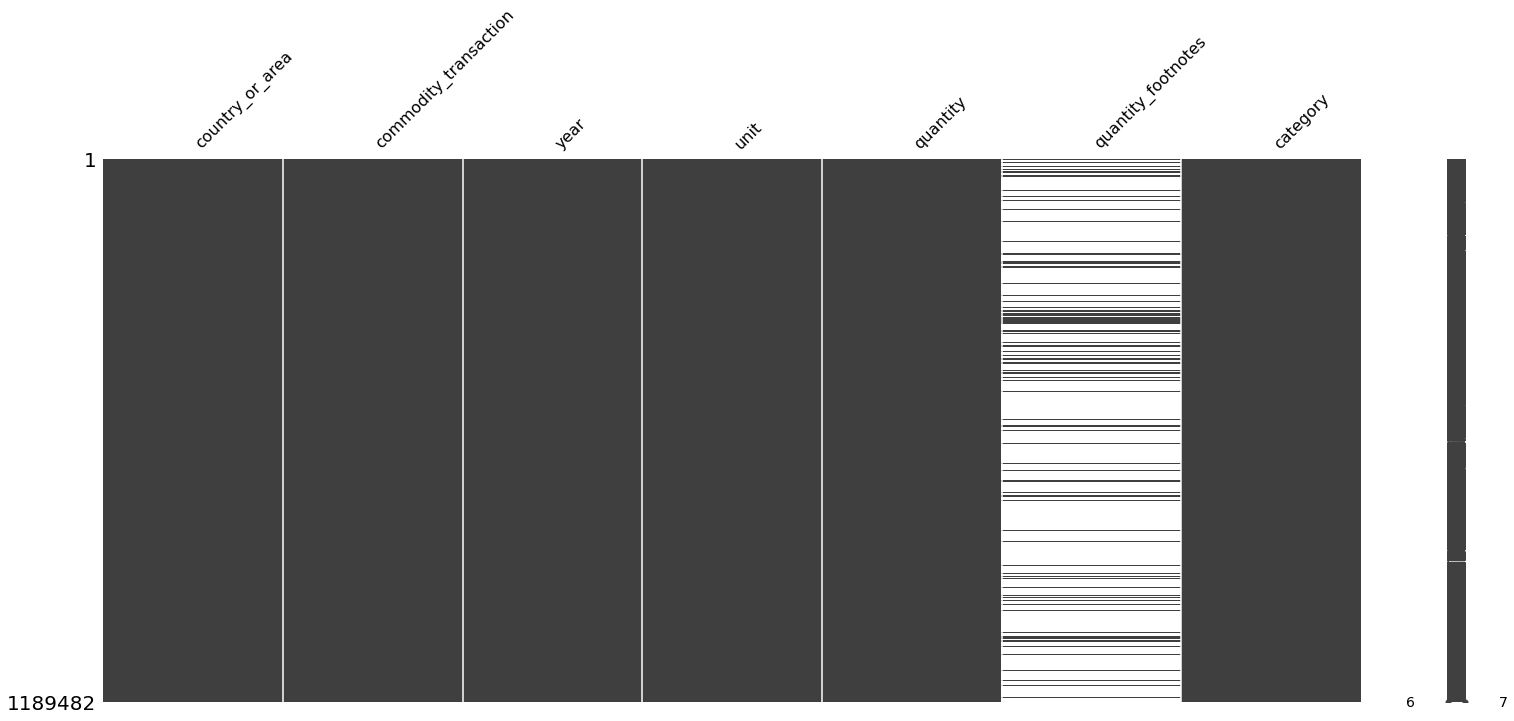

In [9]:
# using missingno package to check for the missingness
msno.matrix(energy)
plt.show()

In [10]:
# checking the quality of footnotes to see if we need those or not
energy['quantity_footnotes'].unique()

array([nan,  1.])

In [11]:
# Since quantity_footnotes is missing lots of value, we are going to drop this column and also it is not adding any value to our analysis
df1 = energy.drop(['quantity_footnotes'], axis=1)
df1.columns


Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'category'],
      dtype='object')

### **2.3 Cleaning and Extraction of Data**

In [12]:
# To avoid any problem on the country_or_area names in the upper and lower, we are going to convert all the names in this & other column to lower case
df1['country_or_area'] = df1['country_or_area'].str.lower()
df1['commodity_transaction'] = df1['commodity_transaction'].str.lower()
df1['unit'] = df1['unit'].str.lower()
df1['category'] = df1['category'].str.lower()
df1.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


In [13]:
# Simplifying the column names by renaming it
df1.columns = ['country', 'commodity', 'year', 'unit', 'quantity', 'category']
df1.head()

,country,commodity,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


In [14]:
# finding the unique years for the data (this confirms that data is from 1990 to 2014)
df1['year'].unique()

array([1996, 1995, 2014, 2013, 2012, 2011, 2010, 2009, 1998, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1997, 1994, 1993,
       1992, 1991, 1990])

In [15]:
# exploring more about the category
df1['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [16]:
# exploring more about the commodity
df1['commodity'].unique()

array(['additives and oxygenates - exports',
       'additives and oxygenates - imports',
       'additives and oxygenates - production', ...,
       'white spirit and special boiling point industrial spirits - transformation',
       'white spirit and special boiling point industrial spirits - transformation in petrochemical plants',
       'electricity - total wind production'], dtype=object)

In [17]:
# Since we are going to focus on the G7 countries, so we are going to create a function to select a country to achieve this goal.
def select_country(countryname):
    country_data = df1[df1.country.isin(countryname)].sort_values('year').reset_index()
    country_data.drop('index', axis=1, inplace=True)
    return country_data

# **G7 Countries 2020**

G7 is a term that is used to describe the Group of Seven. This is a group of seven countries that have the largest and most advanced economies in the world. These are the most industrialized nations in the world.

When breaking down the numbers, the G7 countries represent over 46% of the gross domestic product globally based on nominal values. These countries represent over 32% of the GDP based on purchasing power parity. The countries in this group have more than 62% of the global net wealth – or a total of $280 trillion. 

The nations that are part of G7 include United States, Canada, Germany, France, Italy, Japan and United Kingdom.

Source for Reference: https://worldpopulationreview.com/country-rankings/g7-countries


In [18]:
# Generating data for each country

us_data = select_country(['united states'])
canada_data = select_country(['canada'])
germany_data = select_country(['germany'])
france_data = select_country(['france'])
italy_data = select_country(['italy'])
japan_data = select_country(['japan'])
uk_data = select_country(['united kingdom'])


**Category Function to filter specific category for each country or G7 countries together**

In [19]:
# now selecting the category by creating a function
def select_category(country_data, categoryname):
    category_country = country_data[country_data.category.isin(categoryname)].sort_values('year').reset_index()
    category_country.drop('index', axis=1, inplace=True)
    return category_country

## **3.0 Exploratory Data Analysis and Insights**

### **3.1 Analysis for Conventional Crude Oil Production for G7 Countries**

In [20]:
# Generating category for each country for the conventional crude oil
crude_us = select_category(us_data, ['conventional_crude_oil'])
crude_canada = select_category(canada_data, ['conventional_crude_oil'])
crude_germany = select_category(germany_data, ['conventional_crude_oil'])
crude_france = select_category(france_data, ['conventional_crude_oil'])
crude_italy = select_category(italy_data, ['conventional_crude_oil'])
crude_japan = select_category(japan_data, ['conventional_crude_oil'])
crude_uk = select_category(uk_data, ['conventional_crude_oil'])


In [21]:
# Filtering further for the commodity type
def select_commodity(category_country, commodityname):
    commodity_country = category_country[category_country.commodity.isin(commodityname)].sort_values('year').reset_index()
    commodity_country.drop('index', axis=1, inplace=True )
    return commodity_country

In [22]:
# Filtering data for the conventional crude oil production for the G7 countries

crudeprod_us = select_commodity(crude_us,['conventional crude oil - production'])
crudeprod_canada = select_commodity(crude_canada,['conventional crude oil - production'])
crudeprod_germany = select_commodity(crude_germany,['conventional crude oil - production'])
crudeprod_france = select_commodity(crude_france,['conventional crude oil - production'])
crudeprod_italy = select_commodity(crude_italy,['conventional crude oil - production'])
crudeprod_japan = select_commodity(crude_japan,['conventional crude oil - production'])
crudeprod_uk = select_commodity(crude_uk,['conventional crude oil - production'])


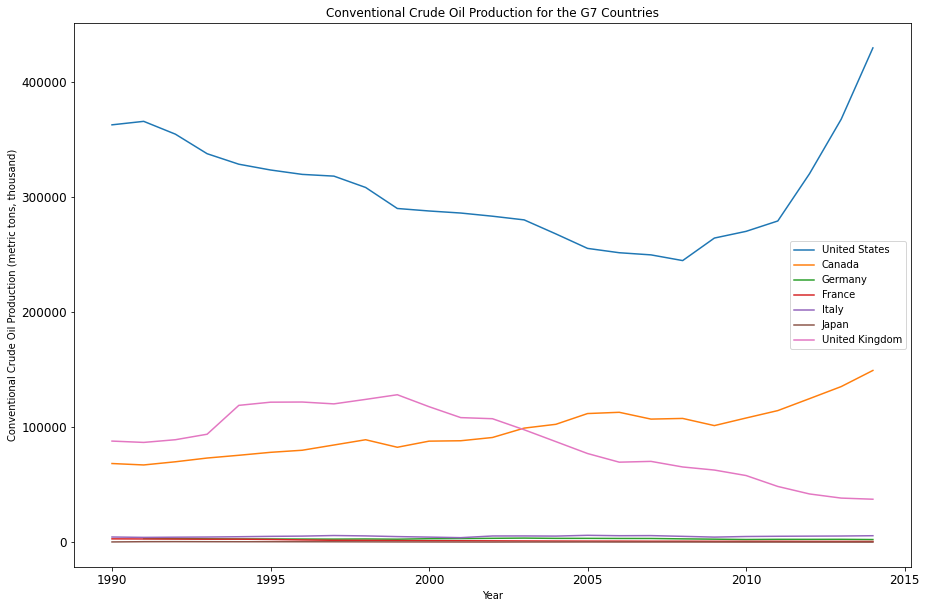

In [23]:
# plotting line graph for each G7 country for the Conventional Crude Production

plt.figure(figsize=(15, 10))
x1 = crudeprod_us.year
y1 = crudeprod_us.quantity
plt.plot(x1, y1, label='United States')
x2 = crudeprod_canada.year
y2 = crudeprod_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = crudeprod_germany.year
y3 = crudeprod_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = crudeprod_france.year
y4 = crudeprod_france.quantity
plt.plot(x4, y4, label='France')
x5 = crudeprod_italy.year
y5 = crudeprod_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = crudeprod_japan.year
y6 = crudeprod_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = crudeprod_uk.year
y7 = crudeprod_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Production (metric tons, thousand)")
plt.title("Conventional Crude Oil Production for the G7 Countries")
plt.legend(loc='best')
plt.show()

There are 3 main countries with the conventional crude oil production among the G7 countries i.e. United States, Canada and United Kingdom. While production is going up in the US and Canada, it is coming down in the UK.

### **3.2 Analysis for Conventional Crude Oil Imports for G7 Countries**

In [24]:
# Filtering data for the conventional crude oil Imports for the G7 countries

crudeimp_us = select_commodity(crude_us,['conventional crude oil - imports'])
crudeimp_canada = select_commodity(crude_canada,['conventional crude oil - imports'])
crudeimp_germany = select_commodity(crude_germany,['conventional crude oil - imports'])
crudeimp_france = select_commodity(crude_france,['conventional crude oil - imports'])
crudeimp_italy = select_commodity(crude_italy,['conventional crude oil - imports'])
crudeimp_japan = select_commodity(crude_japan,['conventional crude oil - imports'])
crudeimp_uk = select_commodity(crude_uk,['conventional crude oil - imports'])


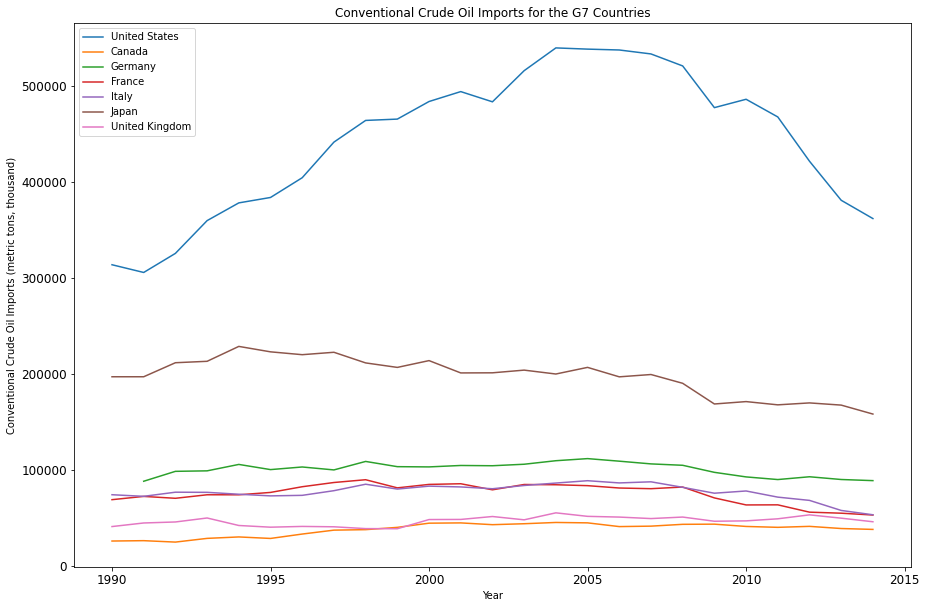

In [25]:
# plotting line graph for each G7 country for the Conventional Crude Imports

plt.figure(figsize=(15, 10))
x1 = crudeimp_us.year
y1 = crudeimp_us.quantity
plt.plot(x1, y1, label='United States')
x2 = crudeimp_canada.year
y2 = crudeimp_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = crudeimp_germany.year
y3 = crudeimp_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = crudeimp_france.year
y4 = crudeimp_france.quantity
plt.plot(x4, y4, label='France')
x5 = crudeimp_italy.year
y5 = crudeimp_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = crudeimp_japan.year
y6 = crudeimp_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = crudeimp_uk.year
y7 = crudeimp_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Imports (metric tons, thousand)")
plt.title("Conventional Crude Oil Imports for the G7 Countries")
plt.legend(loc='best')
plt.show()

There are some interest facts about the Crude Oil imports for various G7 countries such as following:

* Since the demand for the crude oil is high for the US due to so many refineries and huge domestic consumption, import curve shows increase while production is decresing and imports decreasing while production is increasing.
* Since Canada produces enough for its domestic market, it shows Canadian imports the lowest and consistent which are done by the provinces which are far away from the crude refining provinces due to country's huge size.
* Most of the European countries depend on the imports.

### **3.3 Analysis for Solar Electricity for the G7 Countries**

In [26]:
# Generating category for each country for the Solar Electricity

solar_us = select_category(us_data, ['solar_electricity'])
solar_canada = select_category(canada_data, ['solar_electricity'])
solar_germany = select_category(germany_data, ['solar_electricity'])
solar_france = select_category(france_data, ['solar_electricity'])
solar_italy = select_category(italy_data, ['solar_electricity'])
solar_japan = select_category(japan_data, ['solar_electricity'])
solar_uk = select_category(uk_data, ['solar_electricity'])

In [27]:
# Filtering data for the Solar Electricity Production for the G7 countries

solarcap_us = select_commodity(solar_us,['electricity - total solar production'])
solarcap_canada = select_commodity(solar_canada,['electricity - total solar production'])
solarcap_germany = select_commodity(solar_germany,['electricity - total solar production'])
solarcap_france = select_commodity(solar_france,['electricity - total solar production'])
solarcap_italy = select_commodity(solar_italy,['electricity - total solar production'])
solarcap_japan = select_commodity(solar_japan,['electricity - total solar production'])
solarcap_uk = select_commodity(solar_uk,['electricity - total solar production'])


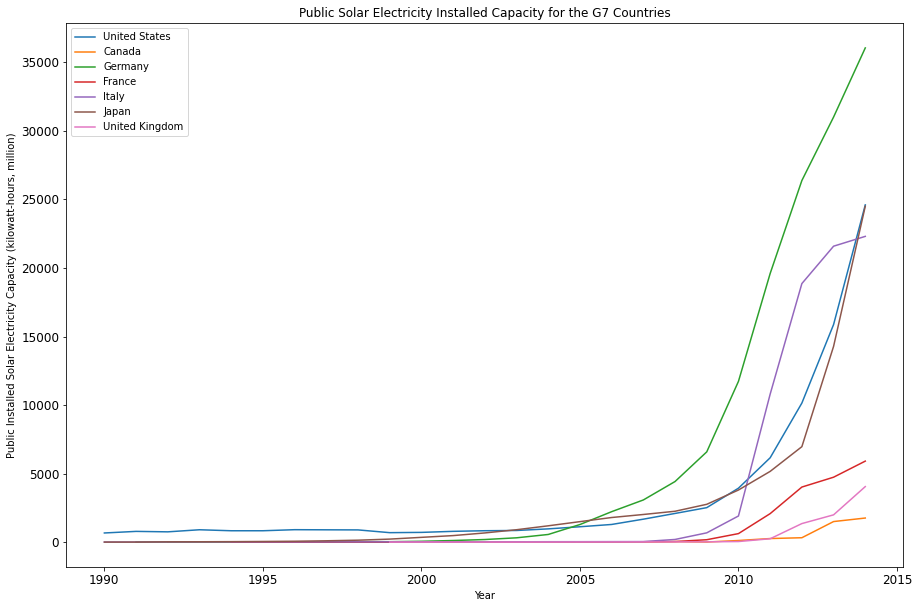

In [28]:
# plotting line graph for each G7 country for the Installed Public Solar Electricity Capacity

plt.figure(figsize=(15, 10))
x1 = solarcap_us.year
y1 = solarcap_us.quantity
plt.plot(x1, y1, label='United States')
x2 = solarcap_canada.year
y2 = solarcap_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = solarcap_germany.year
y3 = solarcap_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = solarcap_france.year
y4 = solarcap_france.quantity
plt.plot(x4, y4, label='France')
x5 = solarcap_italy.year
y5 = solarcap_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = solarcap_japan.year
y6 = solarcap_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = solarcap_uk.year
y7 = solarcap_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Public Installed Solar Electricity Capacity (kilowatt-hours, million)")
plt.title("Public Solar Electricity Installed Capacity for the G7 Countries")
plt.legend(loc='best')
plt.show()

Germany is a leader in the solar electricity production with the US, Japan and Italy following it.

### **3.4 Analysis for Wind Electricity for the G7 Countries**

In [29]:
# Generating category for each country for the Wind Electricity

wind_us = select_category(us_data, ['wind_electricity'])
wind_canada = select_category(canada_data, ['wind_electricity'])
wind_germany = select_category(germany_data, ['wind_electricity'])
wind_france = select_category(france_data, ['wind_electricity'])
wind_italy = select_category(italy_data, ['wind_electricity'])
wind_japan = select_category(japan_data, ['wind_electricity'])
wind_uk = select_category(uk_data, ['wind_electricity'])

In [30]:
# Filtering data for the Wind Electricity Production for the G7 countries

windcap_us = select_commodity(wind_us,['electricity - total wind production'])
windcap_canada = select_commodity(wind_canada,['electricity - total wind production'])
windcap_germany = select_commodity(wind_germany,['electricity - total wind production'])
windcap_france = select_commodity(wind_france,['electricity - total wind production'])
windcap_italy = select_commodity(wind_italy,['electricity - total wind production'])
windcap_japan = select_commodity(wind_japan,['electricity - total wind production'])
windcap_uk = select_commodity(wind_uk,['electricity - total wind production'])

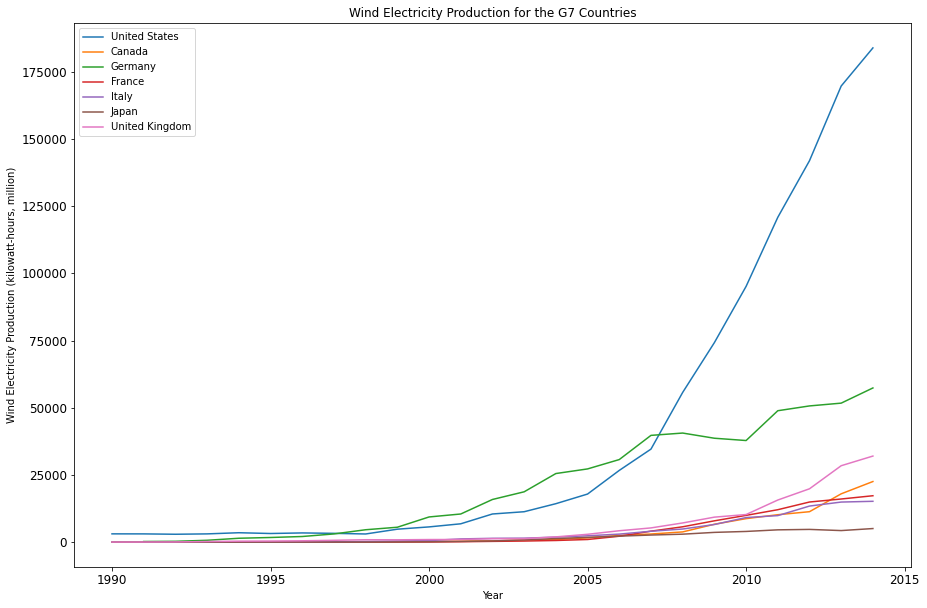

In [31]:
# plotting line graph for each G7 country for the Wind Electricity Production

plt.figure(figsize=(15, 10))
x1 = windcap_us.year
y1 = windcap_us.quantity
plt.plot(x1, y1, label='United States')
x2 = windcap_canada.year
y2 = windcap_canada.quantity
plt.plot(x2, y2, label='Canada')
x3 = windcap_germany.year
y3 = windcap_germany.quantity
plt.plot(x3, y3, label='Germany')
x4 = windcap_france.year
y4 = windcap_france.quantity
plt.plot(x4, y4, label='France')
x5 = windcap_italy.year
y5 = windcap_italy.quantity
plt.plot(x5, y5, label='Italy')
x6 = windcap_japan.year
y6 = windcap_japan.quantity
plt.plot(x6, y6, label='Japan')
x7 = windcap_uk.year
y7 = windcap_uk.quantity
plt.plot(x7, y7, label='United Kingdom')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Wind Electricity Production (kilowatt-hours, million)")
plt.title("Wind Electricity Production for the G7 Countries")
plt.legend(loc='best')
plt.show()

US is the leading wind electricity producer with Germany following it.

## **4.0 Conclusion**

While the analysis has been done only for the following resources, this can be done for any commodity as available in the data set:

* Crude Oil production
* Crude Oil Imports
* Solar Electricity production
* Wind Electricity production

As the focus was on the G7 countries i.e. United States, Canada, Germany, France, Italy, Japan and the United Kingdom, the analysic can be done for any country.